In [1]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100


def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

def clean_state_column(dataframe):
    dataframe.rename(columns={'st':'state'}, inplace=True)
    return dataframe

In [2]:
#importing, lowercasing and indexing the columns of the three different files

file1 = pd.read_csv('file1.csv')
file1 = lower_case_column_names(file1)
file1 = file1 = file1.sort_index(axis=1)
clean_state_column(file1)

,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
file2 = pd.read_csv('file2.csv')
file2 = lower_case_column_names(file2)
file2 = file2 = file2.sort_index(axis=1)
clean_state_column(file2)

,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,GS98873,323912.47%,Bachelor,F,16061,88,1/0/00,Personal Auto,Arizona,633.600000,Four-Door Car
1,CW49887,462680.11%,Master,F,79487,114,1/0/00,Special Auto,California,547.200000,SUV
2,MY31220,899704.02%,College,F,54230,112,1/0/00,Personal Auto,California,537.600000,Two-Door Car
3,UH35128,2580706.30%,College,F,71210,214,1/1/00,Personal Auto,Oregon,1027.200000,Luxury Car
4,WH52799,380812.21%,College,F,94903,94,1/0/00,Corporate Auto,Arizona,451.200000,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,847141.75%,Master,M,63513,70,1/0/00,Personal Auto,Arizona,185.667213,Four-Door Car
992,BS91566,543121.91%,College,F,58161,68,1/0/00,Corporate Auto,Arizona,140.747286,Four-Door Car
993,IL40123,568964.41%,College,F,83640,70,1/0/00,Corporate Auto,Nevada,471.050488,Two-Door Car
994,MY32149,368672.38%,Master,F,0,96,1/0/00,Personal Auto,California,28.460568,Two-Door Car


In [4]:
file3 = pd.read_csv('file3.csv')
file3 = lower_case_column_names(file3)
file3 = file3 = file3.sort_index(axis=1)
clean_state_column(file3)

,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,SA25987,3479.137523,High School or Below,M,0,104,0,Personal Auto,Washington,499.200000,Two-Door Car
1,TB86706,2502.637401,Master,M,0,66,0,Personal Auto,Arizona,3.468912,Two-Door Car
2,ZL73902,3265.156348,Bachelor,F,25820,82,0,Personal Auto,Nevada,393.600000,Four-Door Car
3,KX23516,4455.843406,High School or Below,F,0,121,0,Personal Auto,California,699.615192,SUV
4,FN77294,7704.958480,High School or Below,M,30366,101,2,Personal Auto,California,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,23405.987980,Bachelor,M,71941,73,0,Personal Auto,California,198.234764,Four-Door Car
7066,PK87824,3096.511217,College,F,21604,79,0,Corporate Auto,California,379.200000,Four-Door Car
7067,TD14365,8163.890428,Bachelor,M,0,85,3,Corporate Auto,California,790.784983,Four-Door Car
7068,UP19263,7524.442436,College,M,21941,96,0,Personal Auto,California,691.200000,Four-Door Car


In [5]:
#ensuring all have the same format and merging
file1.columns == file2.columns
file2.columns == file3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [6]:
df = pd.concat([file1,file2,file3], axis=0)
df


,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,PK87824,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,TD14365,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,UP19263,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [7]:

#drop duplicatees and unnecessary columns
df = df.drop_duplicates()
df = df.drop("customer", axis=1)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9127 non-null   object 
 1   education                  9134 non-null   object 
 2   gender                     9012 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9134 non-null   object 
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9134 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(3), object(7)
memory usage: 785.0+ KB


In [9]:
#cleaning some data
#df['customer lifetime value'] = df['customer lifetime value'].astype(str).str.strip('%')
#df['customer lifetime value'] =  pd.to_numeric(df['customer lifetime value'], errors='coerce')

df['customer lifetime value'] = (
    df['customer lifetime value'].apply(lambda x: float(x.replace('%', ''))/100 if type(x) == str else x))
#convert Customer Lifetime Value into integer by first converting it into float
df['customer lifetime value'] = pd.to_numeric(df["customer lifetime value"], errors = 'coerce')
df['customer lifetime value'] = df['customer lifetime value'].apply(lambda x: math.trunc(x) if np.isnan(x) != True else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9135 non-null   int64  
 1   education                  9134 non-null   object 
 2   gender                     9012 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9134 non-null   object 
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9134 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 785.0+ KB


In [10]:

df['customer lifetime value'] = df['customer lifetime value']/100

In [11]:
df["state"].unique()
#df.info()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [12]:
def clean_state(x):
    if x in ['AZ', 'Arizona']:
        return 'Arizona'
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['Oregon']:
        return 'Oregon'
        

In [13]:
df['state'] = list(map(clean_state, df['state'])) 
#df['state'].unique()

In [14]:
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', None],
      dtype=object)

In [15]:
df["gender"].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [16]:
def clean_gender(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ['F', 'Femal', 'female']:
        return 'F'
    else:
        return 'NaN'

In [17]:
df['gender'] = list(map(clean_gender, df['gender'])) 
df['gender'].unique()


array(['NaN', 'F', 'M'], dtype=object)

In [18]:
df['number of open complaints']

0       1/0/00
1       1/0/00
2       1/0/00
3       1/0/00
4       1/0/00
         ...  
7065         0
7066         0
7067         3
7068         0
7069         0
Name: number of open complaints, Length: 9135, dtype: object

In [19]:
def clean_gender(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ['F', 'Femal', 'female']:
        return 'F'
    else:
        return 'NaN'

In [20]:
df['gender'] = list(map(clean_gender, df['gender'])) 
df['gender'].value_counts()

F      4604
M      4408
NaN     123
Name: gender, dtype: int64

In [21]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/0/(.*)','0', regex=True)

df['number of open complaints'].unique()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9135 non-null   float64
 1   education                  9134 non-null   object 
 2   gender                     9135 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9135 non-null   object 
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9134 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(4), object(6)
memory usage: 785.0+ KB


In [22]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/1/(.*)','1', regex=True)


In [23]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/2/(.*)','2', regex=True)


In [24]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/3/(.*)','3', regex=True)


In [25]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/4/(.*)','4', regex=True)


In [26]:
df['number of open complaints'] = df['number of open complaints'].astype(str).str.replace('(.*)/5/(.*)','5', regex=True)

In [27]:
df['number of open complaints'] =  pd.to_numeric(df['number of open complaints'], errors='coerce')

In [28]:
df.info()
#df.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9135 non-null   float64
 1   education                  9134 non-null   object 
 2   gender                     9135 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9134 non-null   float64
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9134 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(5), object(5)
memory usage: 785.0+ KB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9135 non-null   float64
 1   education                  9134 non-null   object 
 2   gender                     9135 non-null   object 
 3   income                     9134 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9134 non-null   float64
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9134 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(5), object(5)
memory usage: 785.0+ KB


In [30]:
df['number of open complaints'].value_counts()

0.0    7252
1.0    1012
2.0     376
3.0     290
4.0     148
5.0      56
Name: number of open complaints, dtype: int64

In [31]:
df['income'] = df['income'].replace(0, np.nan)
df

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,0.00,Master,NaN,NaN,1000.0,0.0,Personal Auto,Washington,2.704934,Four-Door Car
1,69.79,Bachelor,F,NaN,94.0,0.0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,128.87,Bachelor,F,48767.0,108.0,0.0,Personal Auto,Nevada,566.472247,Two-Door Car
3,76.45,Bachelor,M,NaN,106.0,0.0,Corporate Auto,California,529.881344,SUV
4,53.63,High School or Below,M,36357.0,68.0,0.0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
7065,234.05,Bachelor,M,71941.0,73.0,0.0,Personal Auto,California,198.234764,Four-Door Car
7066,30.96,College,F,21604.0,79.0,0.0,Corporate Auto,California,379.200000,Four-Door Car
7067,81.63,Bachelor,M,NaN,85.0,3.0,Corporate Auto,California,790.784983,Four-Door Car
7068,75.24,College,M,21941.0,96.0,0.0,Personal Auto,California,691.200000,Four-Door Car


In [32]:
df['total claim amount'] = pd.to_numeric(df['total claim amount'], errors='coerce')
mean_tca = df['total claim amount'].mean()
mean_tca
df['income'] = pd.to_numeric(df['income'], errors='coerce')
#mean_i = df['income'].mean()
#mean_i

In [33]:
#replacing the missing values of total claim amount with the mean of tca


df['total claim amount'] = df['total claim amount'].fillna(mean_tca)
df['total claim amount'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9135 non-null   float64
 1   education                  9134 non-null   object 
 2   gender                     9135 non-null   object 
 3   income                     6840 non-null   float64
 4   monthly premium auto       9134 non-null   float64
 5   number of open complaints  9134 non-null   float64
 6   policy type                9134 non-null   object 
 7   state                      9134 non-null   object 
 8   total claim amount         9135 non-null   float64
 9   vehicle class              9134 non-null   object 
dtypes: float64(5), object(5)
memory usage: 785.0+ KB


In [34]:
#replacing the missing values of income with the mean of income


df['income'] = df['income'].fillna(df['income'].mean())
df['income'].value_counts()

50510.548684    2295
95697.000000      13
10621.000000       8
61108.000000       8
26876.000000       8
                ... 
75774.000000       1
85412.000000       1
42968.000000       1
16711.000000       1
21941.000000       1
Name: income, Length: 5655, dtype: int64

In [35]:
#replacing the missing values of monthly premium auto with the mean of monthly premium auto

df['monthly premium auto'] = df['monthly premium auto'].fillna(df['monthly premium auto'].mean())
df['monthly premium auto']

0       1000.0
1         94.0
2        108.0
3        106.0
4         68.0
         ...  
7065      73.0
7066      79.0
7067      85.0
7068      96.0
7069      77.0
Name: monthly premium auto, Length: 9135, dtype: float64

In [36]:
#replacing the missing values of customer lifetime value
df['customer lifetime value'] = df['customer lifetime value'].fillna(df['customer lifetime value'].mean())
df['customer lifetime value']

0         0.00
1        69.79
2       128.87
3        76.45
4        53.63
         ...  
7065    234.05
7066     30.96
7067     81.63
7068     75.24
7069     26.11
Name: customer lifetime value, Length: 9135, dtype: float64

In [37]:
df['number of open complaints']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7065    0.0
7066    0.0
7067    3.0
7068    0.0
7069    0.0
Name: number of open complaints, Length: 9135, dtype: float64

In [38]:
#different approaches to solve the state as region task
df = df.rename(columns={'state': 'region'})

In [39]:
def state_region(x):
    if x in ['California']:
        return 'West'
    elif x in ['Oregon']:
        return 'Northwest'
    elif x in ['Washington']:
        return 'East'
    elif x in ['Arizona', 'Nevada']:
        return 'Central'

#state_dict = {}

In [40]:
df['region'] = list(map(state_region, df['region']))
df.head()


,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,region,total claim amount,vehicle class
0,0.00,Master,NaN,50510.548684,1000.0,0.0,Personal Auto,East,2.704934,Four-Door Car
1,69.79,Bachelor,F,50510.548684,94.0,0.0,Personal Auto,Central,1131.464935,Four-Door Car
2,128.87,Bachelor,F,48767.000000,108.0,0.0,Personal Auto,Central,566.472247,Two-Door Car
3,76.45,Bachelor,M,50510.548684,106.0,0.0,Corporate Auto,West,529.881344,SUV
4,53.63,High School or Below,M,36357.000000,68.0,0.0,Personal Auto,East,17.269323,Four-Door Car


In [41]:
df['vehicle class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

In [42]:
#merge the ctaegories
merge_dict = {'Luxury SUV': 'Luxury Vehicle', 'Luxury Car': 'Luxury Vehicle'}
df['vehicle class'] = df['vehicle class'].replace(merge_dict)

In [43]:
#df['vehicle class'].unique()
df.head(100)

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,region,total claim amount,vehicle class
0,0.00,Master,NaN,50510.548684,1000.0,0.0,Personal Auto,East,2.704934,Four-Door Car
1,69.79,Bachelor,F,50510.548684,94.0,0.0,Personal Auto,Central,1131.464935,Four-Door Car
2,128.87,Bachelor,F,48767.000000,108.0,0.0,Personal Auto,Central,566.472247,Two-Door Car
3,76.45,Bachelor,M,50510.548684,106.0,0.0,Corporate Auto,West,529.881344,SUV
4,53.63,High School or Below,M,36357.000000,68.0,0.0,Personal Auto,East,17.269323,Four-Door Car
5,82.56,Bachelor,F,62902.000000,69.0,0.0,Personal Auto,Northwest,159.383042,Two-Door Car
6,53.80,College,F,55350.000000,67.0,0.0,Corporate Auto,Northwest,321.600000,Four-Door Car
7,72.16,Master,M,50510.548684,101.0,0.0,Corporate Auto,Central,363.029680,Four-Door Car
8,241.27,Bachelor,M,14072.000000,71.0,0.0,Corporate Auto,Northwest,511.200000,Four-Door Car
9,73.88,College,F,28812.000000,93.0,0.0,Special Auto,Northwest,425.527834,Four-Door Car


In [44]:

from scipy.stats import zscore

In [45]:


z = np.abs(zscore(df['monthly premium auto']))
df = df[(z < 2.698)]


In [46]:
#y = np.abs(zscore(df['total claim amount']))
#df = df[(y < 2.698)]

In [47]:
x = np.abs(zscore(df['income']))
df = df[(x < 2.698)]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9120 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    9120 non-null   float64
 1   education                  9119 non-null   object 
 2   gender                     9120 non-null   object 
 3   income                     9120 non-null   float64
 4   monthly premium auto       9120 non-null   float64
 5   number of open complaints  9119 non-null   float64
 6   policy type                9119 non-null   object 
 7   region                     9119 non-null   object 
 8   total claim amount         9120 non-null   float64
 9   vehicle class              9119 non-null   object 
dtypes: float64(5), object(5)
memory usage: 783.8+ KB


In [49]:
#######creating a dataframe for the numeric data using slect_dtypes function


numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols


Index(['customer lifetime value', 'income', 'monthly premium auto',
       'number of open complaints', 'total claim amount'],
      dtype='object')

In [99]:
numeric_df = df[numeric_cols]
numeric_df.head()
df['total claim amount'] = df['total claim amount'].round()
df['customer lifetime value'] = df['customer lifetime value'].round(1)

numeric_df.head()


,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,0.0,50511.0,1000.0,0.0,3.0
1,70.0,50511.0,94.0,0.0,1131.0
2,129.0,48767.0,108.0,0.0,566.0
3,76.0,50511.0,106.0,0.0,530.0
4,54.0,36357.0,68.0,0.0,17.0


In [51]:
#######creating a dataframe for the categorial data using slect_dtypes function



categoric_columns = df.select_dtypes(include='object').columns
categoric_columns

Index(['education', 'gender', 'policy type', 'region', 'vehicle class'], dtype='object')

In [52]:
categoric_df = df[categoric_columns]
categoric_df.head(10)

,education,gender,policy type,region,vehicle class
0,Master,NaN,Personal Auto,East,Four-Door Car
1,Bachelor,F,Personal Auto,Central,Four-Door Car
2,Bachelor,F,Personal Auto,Central,Two-Door Car
3,Bachelor,M,Corporate Auto,West,SUV
4,High School or Below,M,Personal Auto,East,Four-Door Car
5,Bachelor,F,Personal Auto,Northwest,Two-Door Car
6,College,F,Corporate Auto,Northwest,Four-Door Car
7,Master,M,Corporate Auto,Central,Four-Door Car
8,Bachelor,M,Corporate Auto,Northwest,Four-Door Car
9,College,F,Special Auto,Northwest,Four-Door Car


In [80]:
df['number of open complaints'].unique()
df['income'] = df['income'].round()

In [54]:
#standardizing the text to lower case

df['education'] = df['education'].str.lower()
df['gender'] = df['gender'].str.lower()
df['policy type'] = df['policy type'].str.lower()
df['region'] = df['region'].str.lower()
df['vehicle class'] = df['vehicle class'].str.lower()



In [55]:
df.head(100)

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,region,total claim amount,vehicle class
0,0.00,master,nan,50510.548684,1000.0,0.0,personal auto,east,2.704934,four-door car
1,69.79,bachelor,f,50510.548684,94.0,0.0,personal auto,central,1131.464935,four-door car
2,128.87,bachelor,f,48767.000000,108.0,0.0,personal auto,central,566.472247,two-door car
3,76.45,bachelor,m,50510.548684,106.0,0.0,corporate auto,west,529.881344,suv
4,53.63,high school or below,m,36357.000000,68.0,0.0,personal auto,east,17.269323,four-door car
5,82.56,bachelor,f,62902.000000,69.0,0.0,personal auto,northwest,159.383042,two-door car
6,53.80,college,f,55350.000000,67.0,0.0,corporate auto,northwest,321.600000,four-door car
7,72.16,master,m,50510.548684,101.0,0.0,corporate auto,central,363.029680,four-door car
8,241.27,bachelor,m,14072.000000,71.0,0.0,corporate auto,northwest,511.200000,four-door car
9,73.88,college,f,28812.000000,93.0,0.0,special auto,northwest,425.527834,four-door car


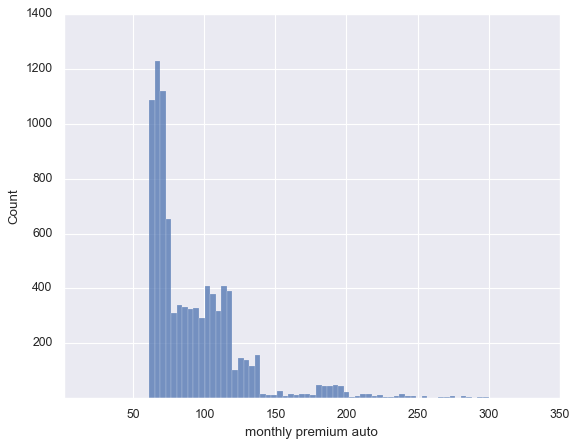

In [94]:
###PLot the shit out of this monthly premium auto
df['monthly premium auto'].value_counts()

fig, ax = plt.subplots()
sns.histplot(df['monthly premium auto'], ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,350)
ax.set_ylim(1,1400)
plt.show()

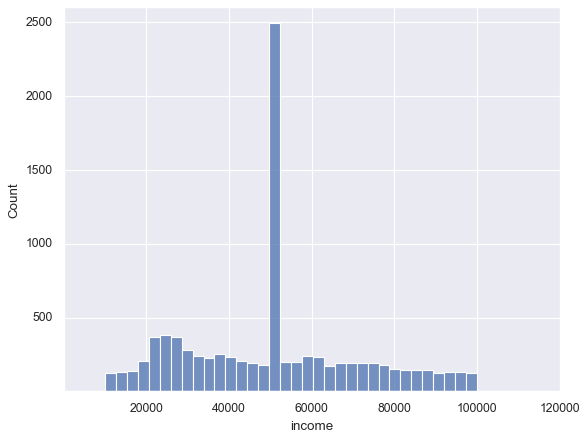

In [95]:
fig, ax = plt.subplots()
sns.histplot(df['income'], ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,120000)
ax.set_ylim(1,2600)
plt.show()